# 어떤 광고가 반응이 더 좋은가?
#### 게임 개빌회사 A는 지난 문제를 현명하게 해결하고 안정적인 영업을 하고 있으나, 매월 실시하고 있는 게임아이템 판매 이벤트에 대해 고객들의 구매율이 상대적으로 낮음을 확인하였음.
#### 우리 회사는 맨날 무슨 일이 터지나?
![](2-1.jpg)


#### 유력 가설: 이벤트 공지 및 홍보 활동에 문제가 있다. 구체적으로 우리 게임에 대한 광고 클릭률이 항상 낮다고 한다.
#### 해결책: 다양한 광고를 조사하고 비교해서 우리 게임 광고 클릭

## 1. Loading data

#### 1) 필요한 라이브러리들을 호출

In [1]:
#데이터 분석에 필요한 패키지들을 파이썬으로 호출
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
%matplotlib inline

#### 2) 각 변수별로 데이터 할당 

In [3]:
imp = pd.read_csv('ab_test_imp.csv')
goal = pd.read_csv('ab_test_goal.csv')

![](2-2.jpg)

#### 3) 호출된 데이터 정보 확인

In [9]:
imp.head(2)

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2017-10-01,game-01,sales_test,B,36703,25622
1,2017-10-01,game-01,sales_test,A,44339,25623


In [8]:
goal.head(1)

,log_date,app_name,test_name,test_case,user_id,transaction_id
0,2017-10-01,game-01,sales_test,B,15021,25638


# 2. Data cleaning

#### 1) 각 데이터들을 결합

In [10]:
#두 데이터 결합하기 
ImpGoal = imp.merge(goal, on = ["transaction_id"],how="outer")

In [15]:
ImpGoal.head()

,log_date_x,app_name_x,test_name_x,test_case_x,user_id_x,transaction_id,log_date_y,app_name_y,test_name_y,test_case_y,user_id_y
0,2017-10-01,game-01,sales_test,B,36703.0,25622,NaN,NaN,NaN,NaN,NaN
1,2017-10-01,game-01,sales_test,A,44339.0,25623,NaN,NaN,NaN,NaN,NaN
2,2017-10-01,game-01,sales_test,B,32087.0,25624,NaN,NaN,NaN,NaN,NaN
3,2017-10-01,game-01,sales_test,B,10160.0,25625,NaN,NaN,NaN,NaN,NaN
4,2017-10-01,game-01,sales_test,B,46113.0,25626,NaN,NaN,NaN,NaN,NaN


#### 2) 일자별 정렬을 위한 날짜 처리

In [16]:
# ImpGoal 데이터프레임 내 "log_date_x"시리즈를 datetime 유형으로 변경
ImpGoal['log_date_x'] = ImpGoal['log_date_x'].apply(lambda x: pd.to_datetime(str(x)))

#### 3) 광고별 클릭률 지표 설정

In [18]:
#"is.goal" 시리즈를 만들고 "user_id_y"값이 "true"이면 0, 그렇지 않으면 1으로 표시
ImpGoal['is_goal'] = np.where(pd.isnull(ImpGoal['user_id_y'])==True,0,1)

In [21]:
ImpGoal.head(1)


,log_date_x,app_name_x,test_name_x,test_case_x,user_id_x,transaction_id,log_date_y,app_name_y,test_name_y,test_case_y,user_id_y,is_goal
0,2017-10-01,game-01,sales_test,B,36703.0,25622,NaN,NaN,NaN,NaN,NaN,0


# 3. Data analysis

#### 1) 광고별 클릭률 확인

In [28]:
# 광고A와 광고B의 각 클릭률 비교
ImpGoal['is_goal'].groupby(ImpGoal['test_case_x']).mean()

test_case_x
A    0.080256
B    0.115392
Name: is_goal, dtype: float64

#### 2) 각 광고별 클릭률 트렌드 확인

In [31]:
#"log_date_x" 기준에 따라 각 광고별 클릭률을 정렬
data = ImpGoal.groupby(['log_date_x', 'test_case_x'])['is_goal'].mean()

In [33]:
data.head()

log_date_x  test_case_x
2017-10-01  A              0.072165
            B              0.126528
2017-10-02  A              0.064234
            B              0.159040
2017-10-03  A              0.140148
Name: is_goal, dtype: float64

# 4. Data Visualization

#### 1) 각 광고별 클릭률 트렌드 시각화

In [34]:
# unstack()함수를 이용해 완전한 데이터 정규화시키기
data = data.unstack('test_case_x')

In [35]:
data.head()

test_case_x,A,B
log_date_x,,
2017-10-01,0.072165,0.126528
2017-10-02,0.064234,0.159040
2017-10-03,0.140148,0.150041
2017-10-04,0.058514,0.119015
2017-10-05,0.035287,0.065637


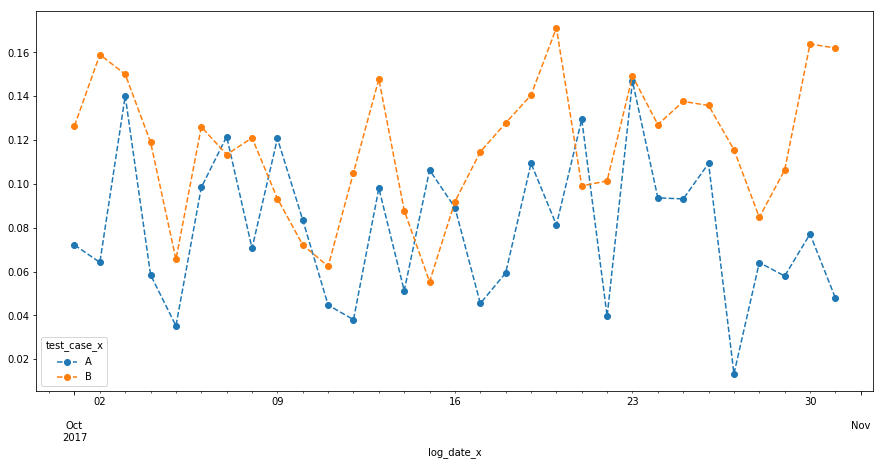

In [36]:
#완성된 데이터를 이용해 시각화 수행
data.plot.line(figsize=(15,7), style='--',marker = 'o')